In [1]:
import pandas as pd
import numpy as np
import acquire
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns

import prepare

# I. Store Item Demand

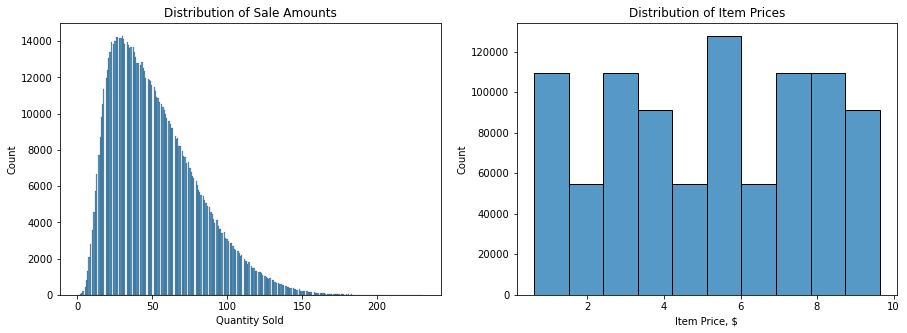

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Wednesday,9.24


In [2]:
df = prepare.store_data_prep()
df.head(2)

In [3]:
df.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-02 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-05 00:00:00+00:00', '2013-01-06 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
               '2013-01-09 00:00:00+00:00', '2013-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, GMT]', name='sale_date', length=913000, freq=None)

## 1. Using a human-based approach, split your dataset into train and test sets.

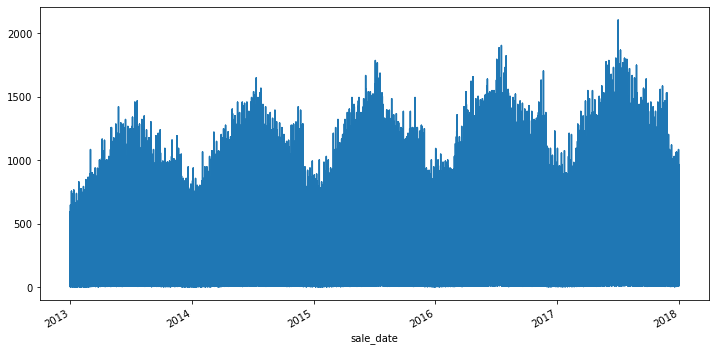

In [4]:
plt.figure(figsize = (12,6))
df.sales_total.plot()
plt.show()

In [5]:
train = df[:'2016']
test = df['2017']

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_15352/3233208282.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [8]:
df.shape[0] == (train.shape[0] + test.shape[0])

True

## 2. Visualize your train-test split.

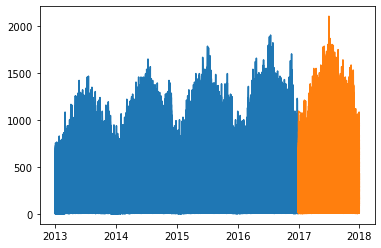

In [9]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

## 3. Resample your data and visualize it.

To make this easier will pull out the target, sales_total, and assign to y:

In [10]:
y = df.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    10.92
2013-01-02 00:00:00+00:00     9.24
2013-01-03 00:00:00+00:00    11.76
2013-01-04 00:00:00+00:00    10.92
2013-01-05 00:00:00+00:00     8.40
Name: sales_total, dtype: float64

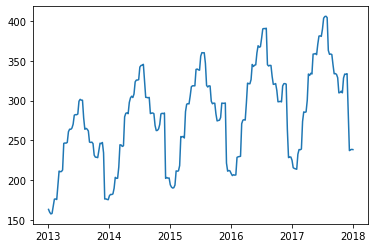

In [11]:
y_weekly = y.resample('W').mean()
plt.plot(y_weekly)

## 4. Creating a rolling (moving) average of your data and visualize it.

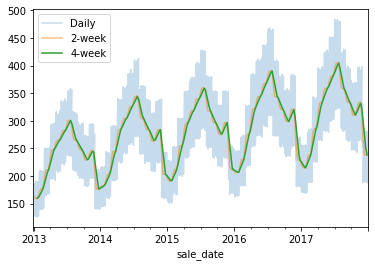

In [12]:
y.resample('D').mean().plot(alpha=.25, label='Daily')
y.resample('W').mean().rolling(2).mean().plot(alpha=.5,label='2-week')
y.resample('W').mean().rolling(4).mean().plot(label='4-week')
plt.legend()
plt.show()

## 5. Plot the difference in sales from one day to the next.

<AxesSubplot:title={'center':'Average change of sales, day to day'}, xlabel='sale_date'>

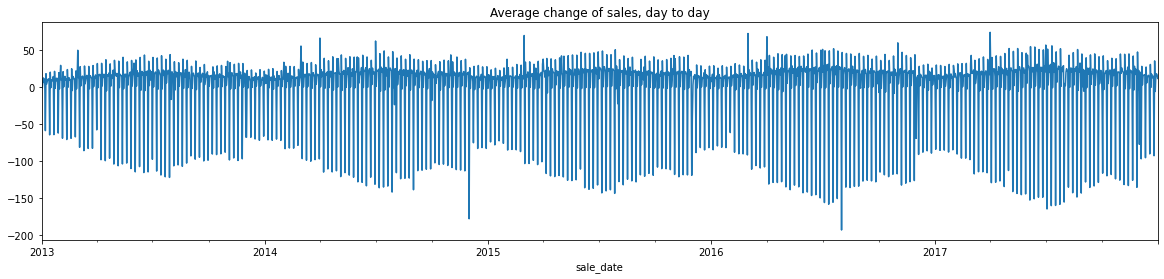

In [14]:
plt.figure(figsize = (20,4))
y.resample('D').mean().diff().plot(title='Average change of sales, day to day')

## 6. Plot the % difference in sales from one day to the next.

<AxesSubplot:title={'center':'% difference in sales, day to day'}, xlabel='sale_date'>

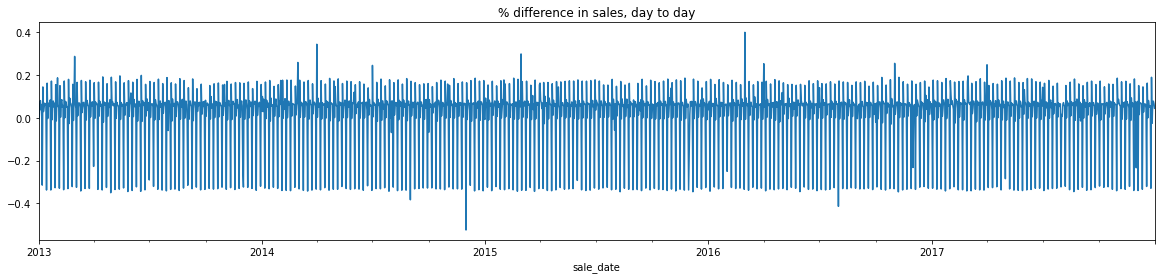

In [16]:
plt.figure(figsize = (20,4))
(y.resample('D').mean().diff()/y.resample('D').mean().shift()).plot(title='% difference in sales, day to day')

## 7. Plot the % difference in sales from one week to the next.

<AxesSubplot:title={'center':'% difference in sales, week to week'}, xlabel='sale_date'>

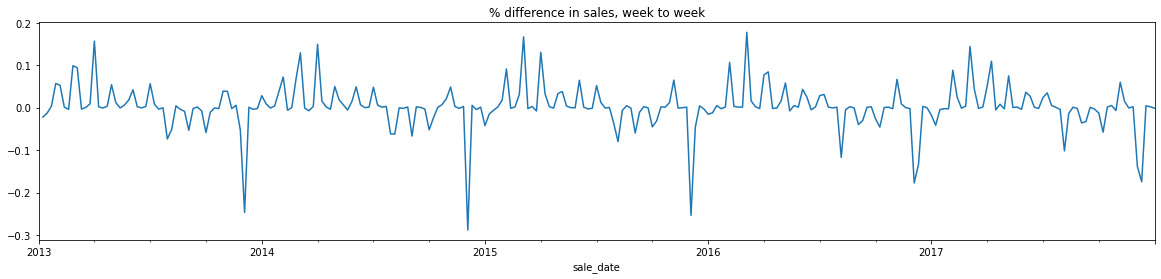

In [17]:
plt.figure(figsize = (20,4))
(y.resample('W').mean().diff()/y.resample('W').mean().shift()).plot(title='% difference in sales, week to week')

## 8. Plot the % difference in sales from one month to the next.

<AxesSubplot:title={'center':'% difference in sales, month to month'}, xlabel='sale_date'>

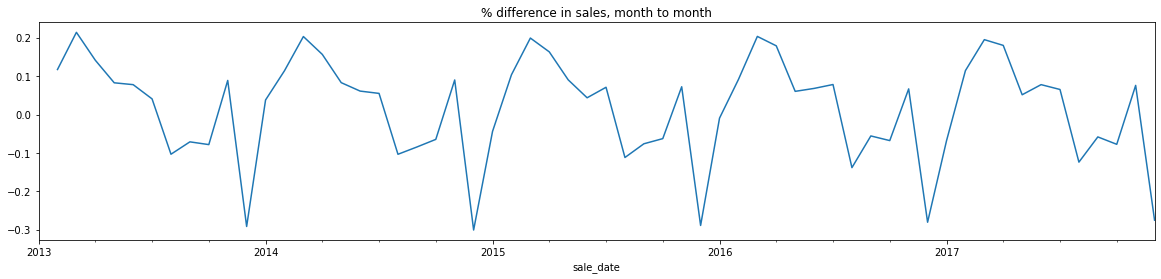

In [18]:
plt.figure(figsize = (20,4))
(y.resample('M').mean().diff()/y.resample('M').mean().shift()).plot(title='% difference in sales, month to month')

## 9. Visualize an autocorrelation plot on a weekly resampling.

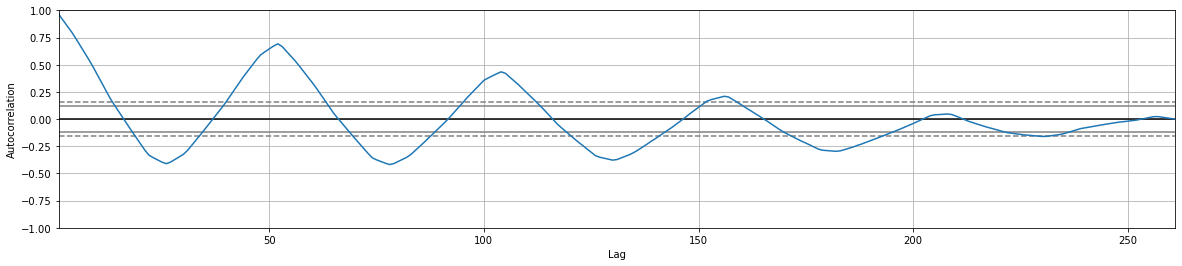

In [20]:
plt.figure(figsize = (20,4))
pd.plotting.autocorrelation_plot(y.resample('W').mean())
plt.show()

## 10. Visualize a seasonal decomposition plot on a weekly resampling.

In [22]:
import statsmodels.api as sm

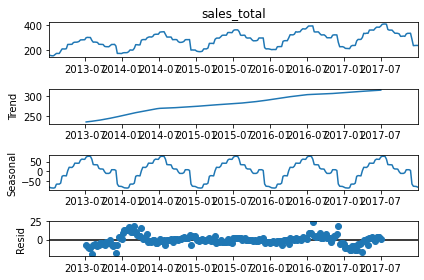

In [35]:
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
plt.show()

# II. OPS Data

Count of days of Consumption at a given energy level (x-axis):


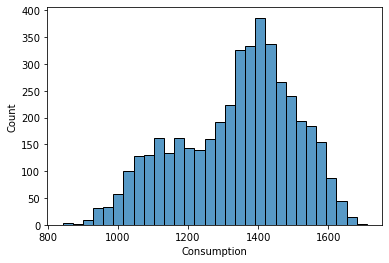

----------

Count of days of Wind at a given energy level (x-axis):


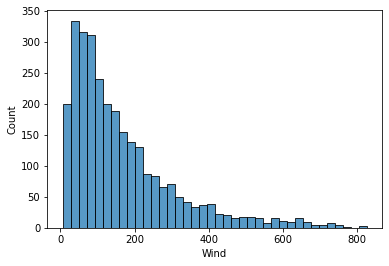

----------

Count of days of Solar at a given energy level (x-axis):


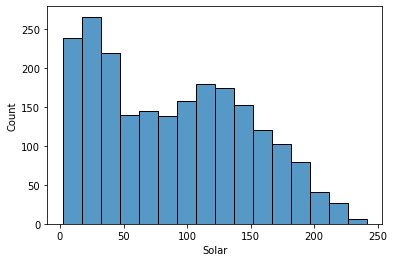

----------

Count of days of Wind+Solar at a given energy level (x-axis):


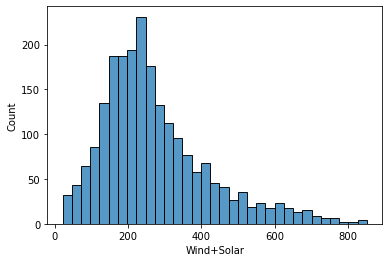

----------



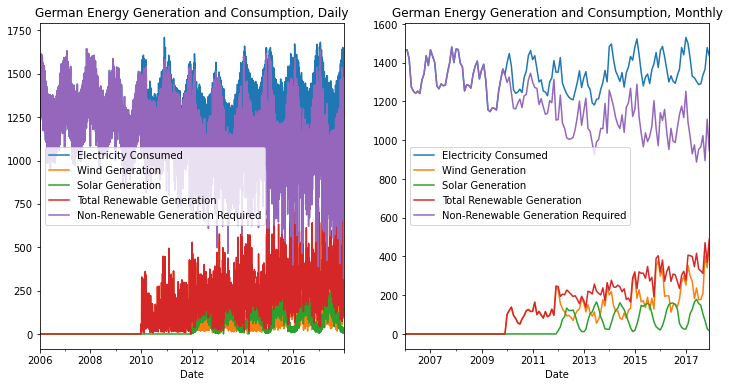

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Consumption    4383 non-null   float64
 1   Wind           4383 non-null   float64
 2   Solar          4383 non-null   float64
 3   Wind+Solar     4383 non-null   float64
 4   month          4383 non-null   int64  
 5   year           4383 non-null   int64  
 6   Non-Renewable  4383 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 273.9 KB


,Consumption,Wind,Solar,Wind+Solar,month,year,Non-Renewable
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006,1069.184
2006-01-02,1380.521,0.0,0.0,0.0,1,2006,1380.521


In [36]:
df2 = prepare.OPS_data_prep()
df2.info()
df2.head(2)

## 1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.

In [46]:
train2 = df2[:'2013']
test2 = df2['2014':]

In [47]:
df2.shape[0] == train2.shape[0] + test2.shape[0]

True

## 2. Visualize your train-test split.

Train/Test split for Consumption


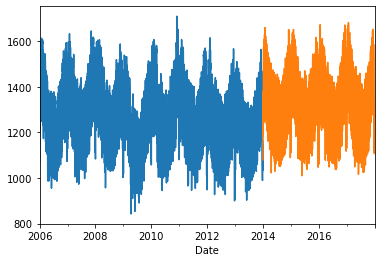

Train/Test split for Wind


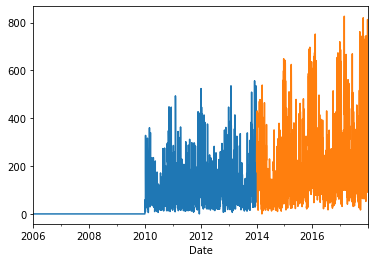

Train/Test split for Solar


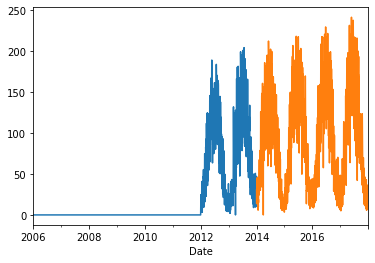

Train/Test split for Wind+Solar


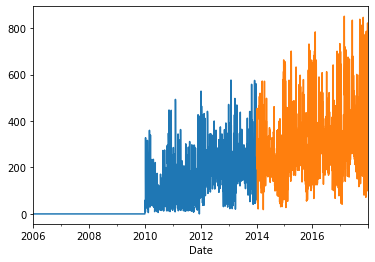

Train/Test split for Non-Renewable


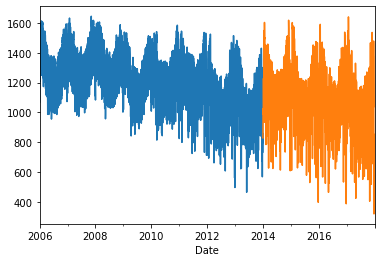

In [48]:
for i in ['Consumption','Wind','Solar','Wind+Solar','Non-Renewable']:
    print(f'Train/Test split for {i}')
    train2[i].plot()
    test2[i].plot()
    plt.show()

## 3. Plot the consumption, wind, and solar data on the same chart.

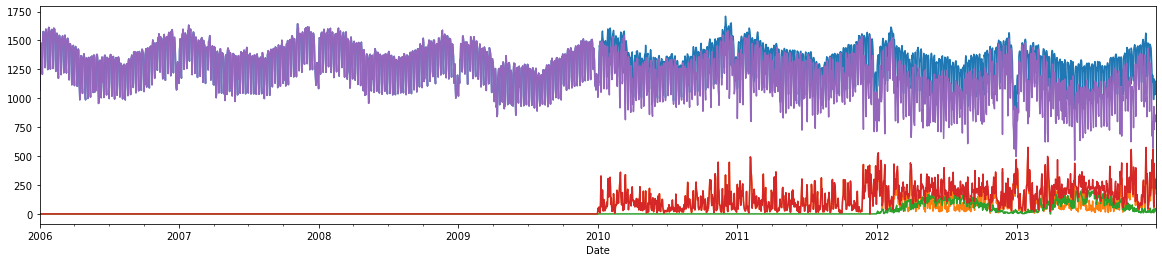

In [50]:
plt.figure(figsize=(20,4))
train2.Consumption.plot(label='Electricity Consumed')
train2.Wind.plot(label='Wind Generation')
train2.Solar.plot(label='Solar Generation')
train2['Wind+Solar'].plot(label='Total Renewable Generation')
train2['Non-Renewable'].plot(label='Non-Renewable Generation Required')
plt.show()

## 4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

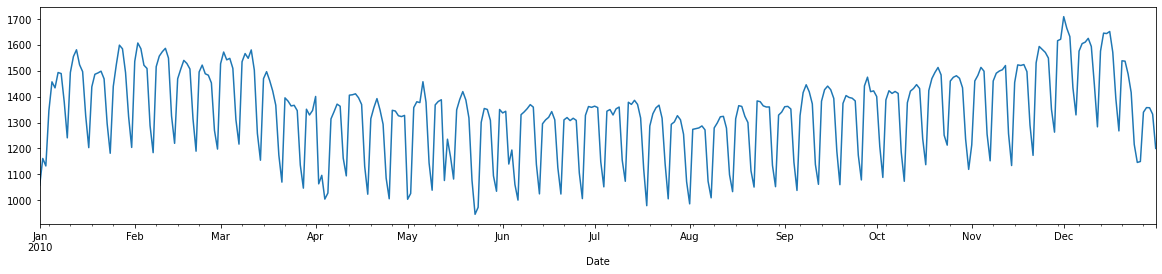

In [57]:
train2010 = train2[train2.year == 2010]

plt.figure(figsize=(20,4))
train2010.Consumption.plot()
plt.show()

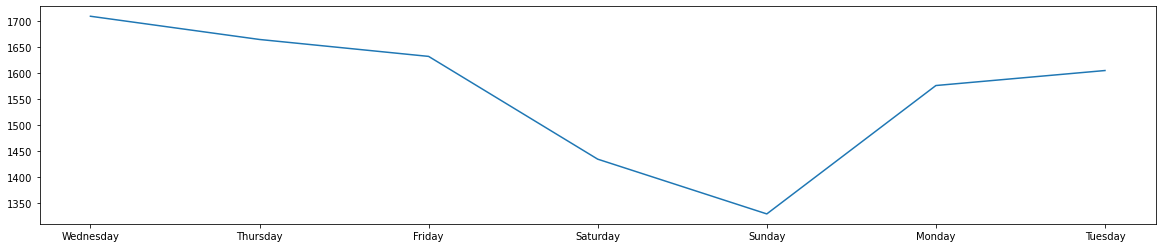

In [63]:
train_dec = train2010[train2010.month == 12]

plt.figure(figsize = (20,4))
plt.plot(train_dec.index.day_name()[:7], train_dec.Consumption[:7])
plt.show()

#### Germans consume more energy in the winter than in the summer.  Also interesting to note, they use more during the week than during the weekend.  Makes sense - they use energy for heat in winter and for work during the week.

## 5. Resample the consumption data to monthly and plot it.

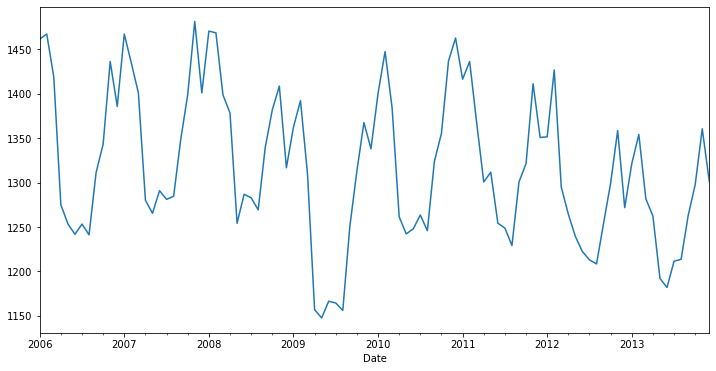

In [64]:
plt.figure(figsize=(12,6))
train2.resample('M').mean().Consumption.plot(label='Monthly Electricity Consumed')
plt.show()

## 6. Resample the consumption data to yearly and plot it.